## Exploratory Data Analysis (EDA)

In [1]:
%%capture
#Load data_preparation file
%run data_preparation.ipynb

In [2]:
#Get dataset statistics
dataset.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


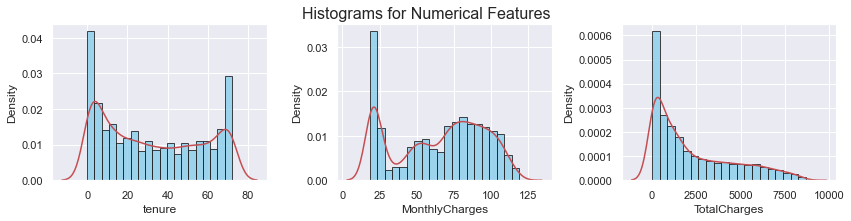

In [10]:
#Create subplots for each numerical feature
plt.figure(figsize=(12, 3))

#Loop through numerical columns
for i, column in enumerate(dataset.select_dtypes(include=["int64", "float"]), 1):
    plt.subplot(1, 3, i)
    plt.hist(dataset[column], bins=20, color="skyblue", edgecolor="k", alpha=0.8, density = True)
    sns.kdeplot(dataset[column], color="r")
    plt.xlabel(column)
    plt.ylabel("Density")
    
plt.tight_layout()
plt.suptitle("Histograms for Numerical Features", fontsize=16, y=1.02)
plt.show()

In [4]:
categorical_columns = dataset.select_dtypes(include=['object'])
categorical_columns

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


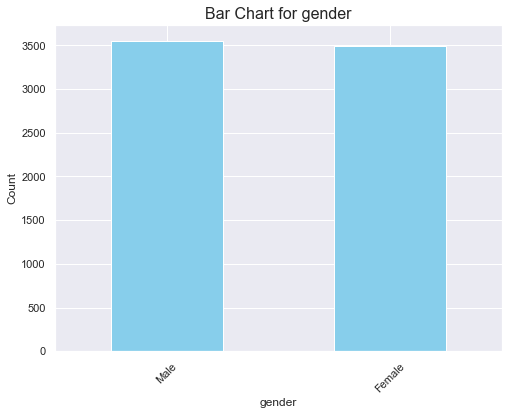

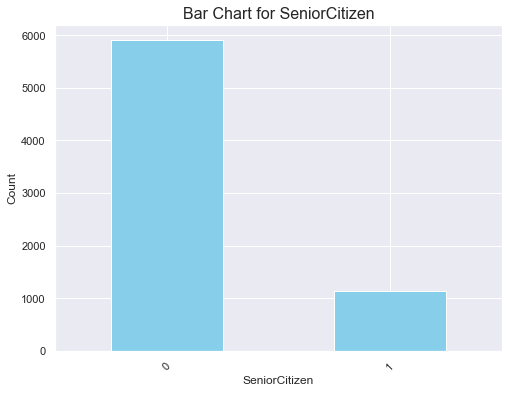

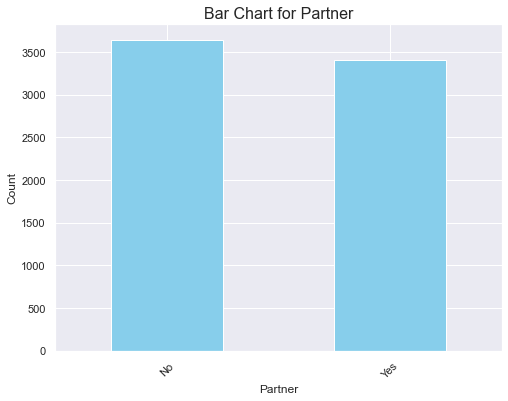

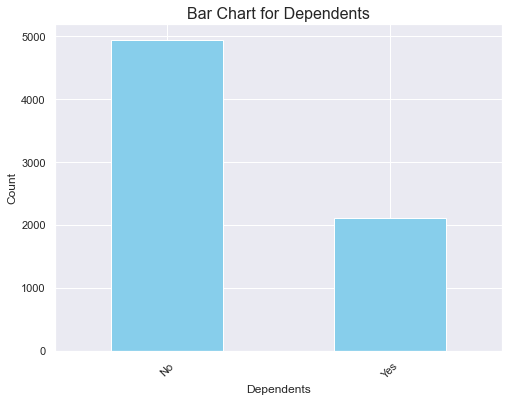

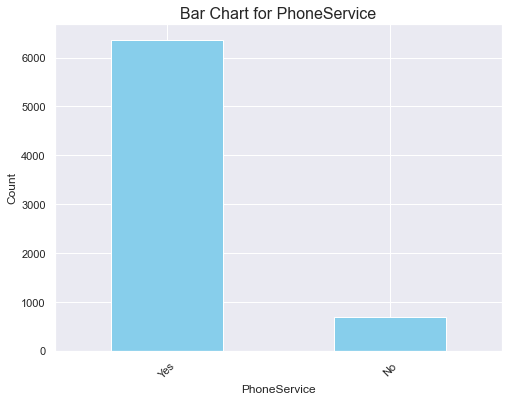

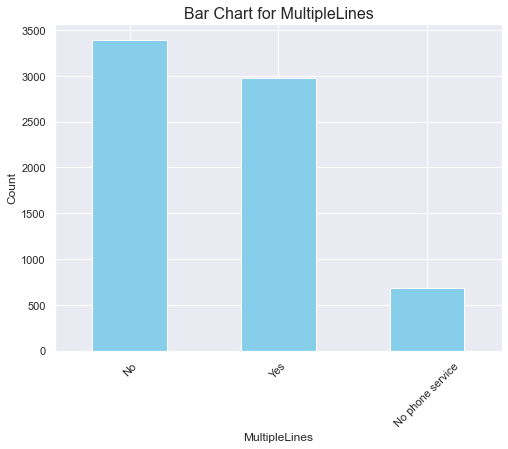

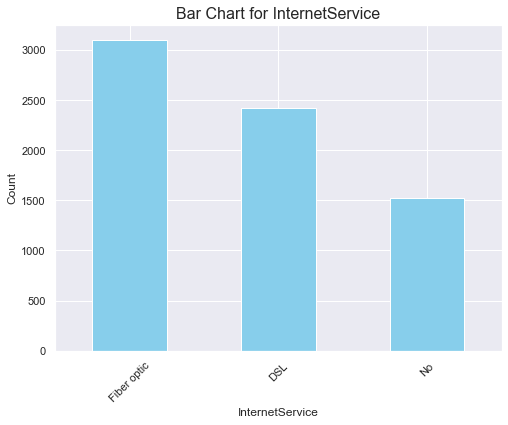

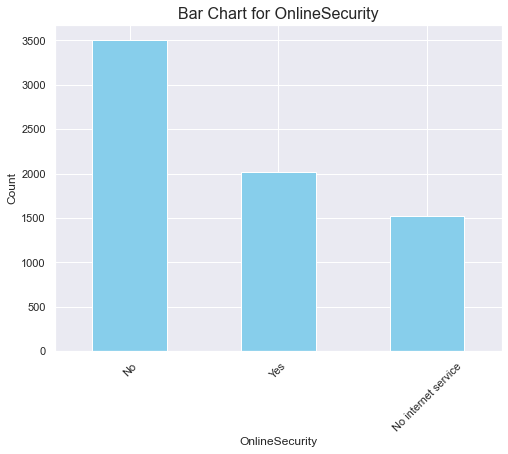

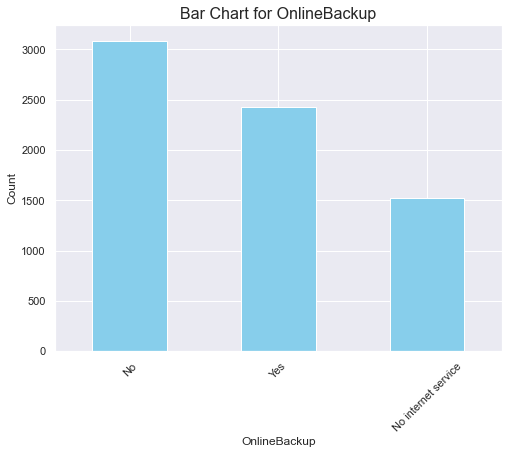

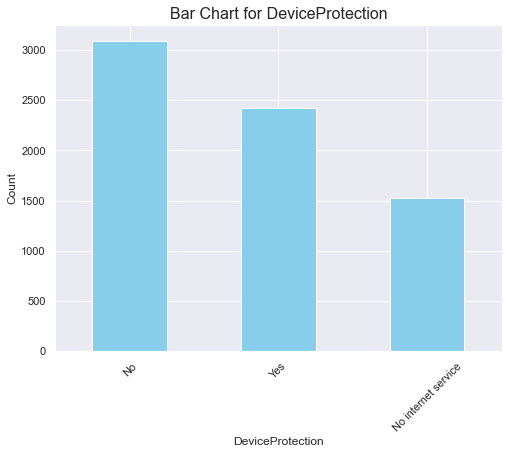

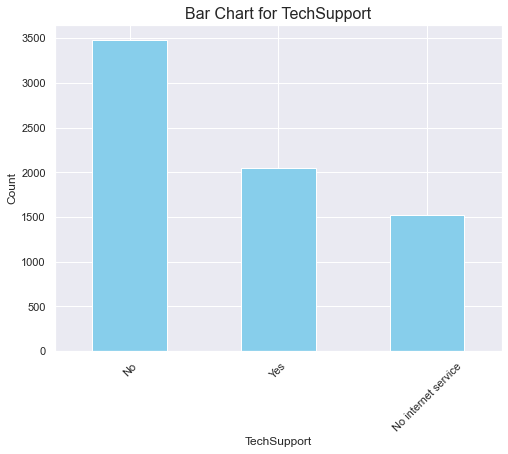

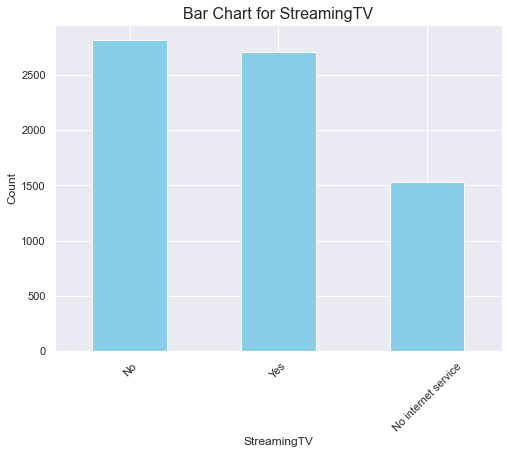

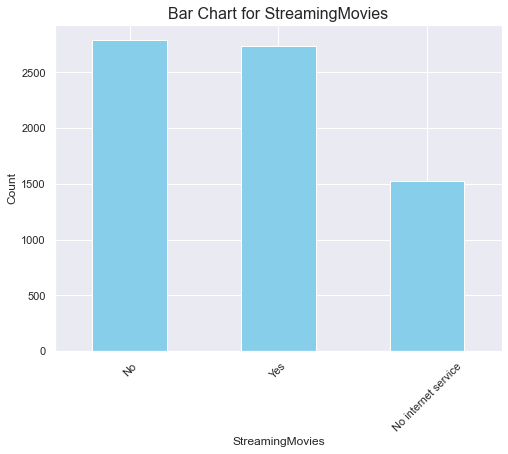

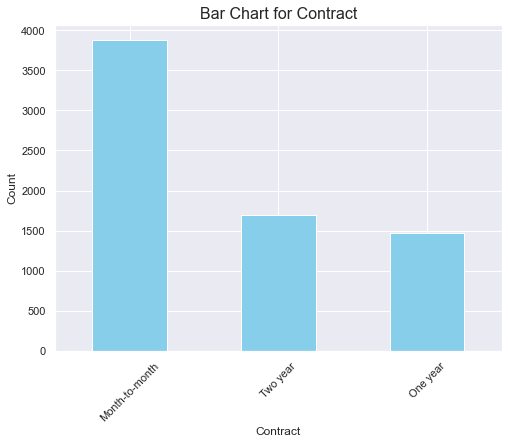

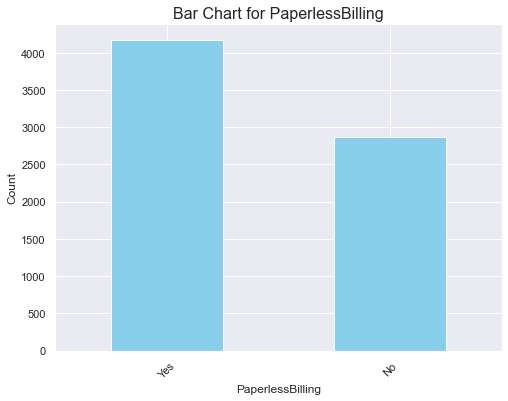

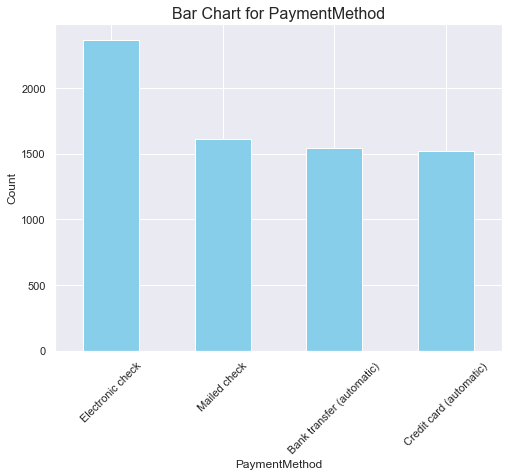

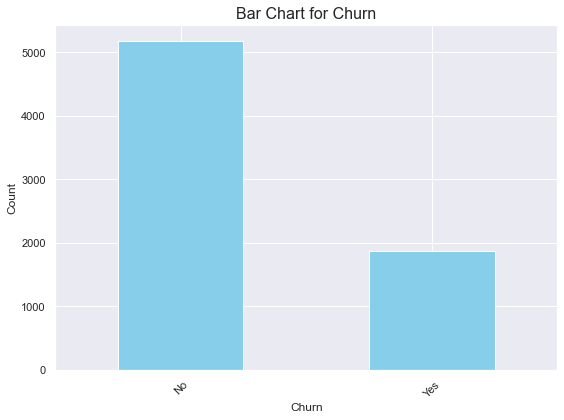

In [5]:
#Get the categorical columns and skip customerID column
categorical_columns = dataset.select_dtypes(include=['object'])
#Loop through categorical columns
for column in categorical_columns.iloc[:, 1:]:
    #Create a bar chart
    plt.figure(figsize=(8, 6))
    dataset[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Bar Chart for {column}', fontsize=16)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'get_figure'

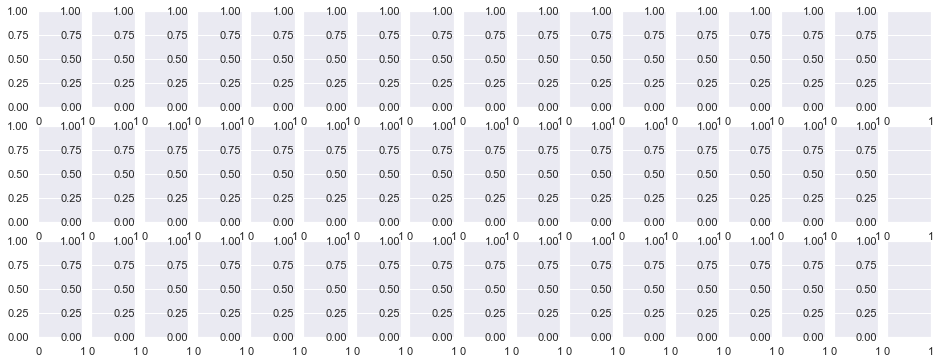

In [14]:
#Get the categorical columns and skip customerID column
categorical_columns = dataset.select_dtypes(include=["object"]).iloc[:, 1:]

#Calculate the number of subplots needed
num_subplots = len(categorical_columns.columns)

# Create a main plot with subplots
fig, axes = plt.subplots(3, num_subplots, figsize=(16, 6))

# Loop through categorical columns
for i, column in enumerate(categorical_columns.columns):
    # Create a bar chart on the i-th subplot
    dataset[column].value_counts().plot(kind='bar', color='skyblue', ax=axes[i])
    axes[i].set_title(f'Bar Chart for {column}', fontsize=12)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

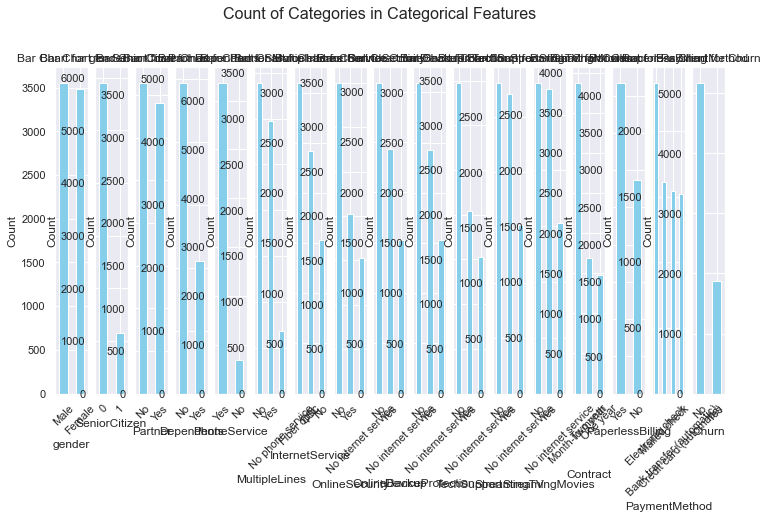

In [17]:
#Get the categorical columns and skip customerID column
categorical_columns = dataset.select_dtypes(include=["object"]).iloc[:, 1:]

# Create a bar chart for all categorical columns on one plot
plt.figure(figsize=(12, 6))

# Loop through categorical columns
for i, column in enumerate(categorical_columns.columns):
    plt.subplot(1, len(categorical_columns.columns), i + 1)
    dataset[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Bar Chart for {column}', fontsize=12)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.suptitle("Count of Categories in Categorical Features", fontsize=16, y=1.02)
plt.show()